# HR Analytics Project- Understanding the Attrition in HR

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [136]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
#reading a dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


with the above observation of dataset,our target variable is Attrition and we are going to predict Attrition considering the features like Department,EducationField ,etc., which are given in the dataset

In [147]:
df.duplicated().sum()

0

So,there are no duplicate records

In [148]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [149]:
#with that,we can remove column "Over18" which is consisting of just one value as "y"
df = df.drop(['Over18'],axis=1)

In [150]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [151]:
#with that,we can remove column "StandardHours" which is consisting of just one value as "80"
df = df.drop(['StandardHours'],axis=1)

In [152]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [153]:
#with that,we can remove column "EmployeeCount" which is consisting of just one value as "1"
df = df.drop(['EmployeeCount'],axis=1)

In [154]:
#we can also drop "EmployeeNumber" column which is consisting of unique id numbers for each employee.
df = df.drop(['EmployeeNumber'],axis=1)

In [155]:
#to check how many rows and columns in dataframe
df.shape

(1470, 31)

In [156]:
#to get the info of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

with above details,we can observe all the datatypes of each column along with memory consumption of dataset

In [157]:
#to get statistics information
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


with above information,we can see there no missing values in any column and we can also observe the fact that many columns contains a minimum value of even 0 value,which means the value can even go with zero amount as well.

In [158]:
#to check all the values count in dependent variable 'wins(W)'
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

with this,we can say that its a imbalanced data

In [159]:
#to check whether any null values present in dataframe
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

So,there are no null values in the dataset

# Visualization

Text(0.5, 1.0, 'histogram of Attrition')

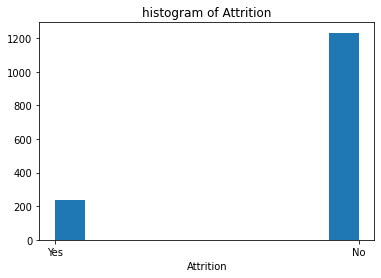

In [160]:
#visualize the histogram of wins
plt.hist(df['Attrition'])
plt.xlabel('Attrition')
plt.title('histogram of Attrition')

we can clearly see that "NO" values are more occuring then "YES" values.
SO,we can deal with this kind of imbalanced data by using a F1-score as our metrics evaluation method after training the model

In [161]:
import warnings
warnings.filterwarnings('ignore') #to remove warning messages

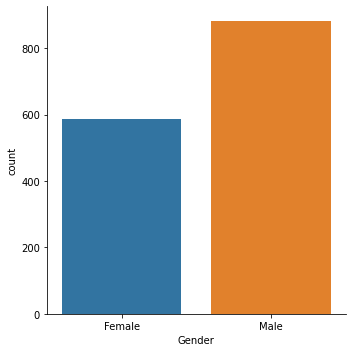

In [162]:
sns.factorplot('Gender', data=df, kind="count") ## Let's check gender

So,there are more records on male employee then female employee

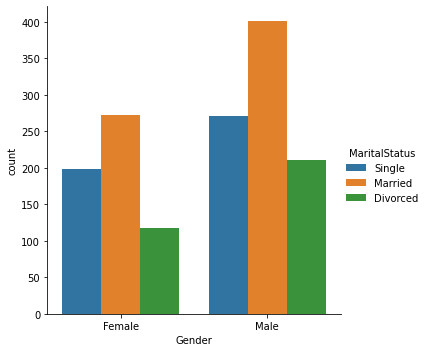

In [163]:
# Now let's seperate the genders by MaritalStatus  using 'hue' arguement 

sns.factorplot('Gender', data=df, kind="count", hue='MaritalStatus')

So,most records on employees who are married and minimum records are on divorced employee.

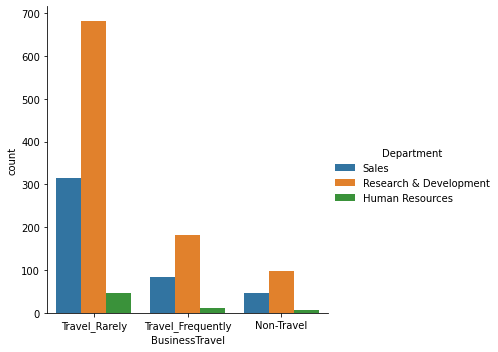

In [164]:
# Now let's seperate the BusinessTravel by Department  using 'hue' arguement 

sns.factorplot('BusinessTravel', data=df, kind="count", hue='Department')

So,employees are more who travels rarely and most employees are in Research & Development department

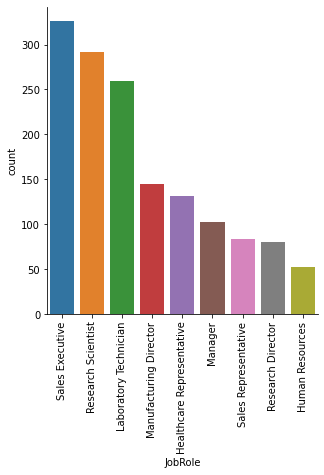

In [165]:
a = sns.factorplot('JobRole', data=df, kind="count")
a.set_xticklabels(rotation=90)

So,most employees are working in as Sales Executive

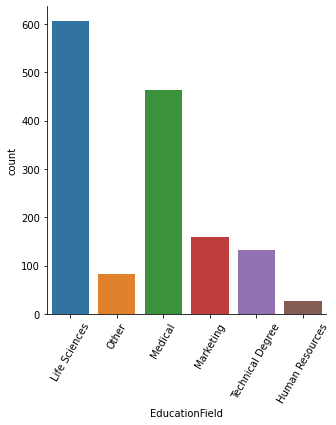

In [166]:
a = sns.factorplot('EducationField', data=df, kind="count")
a.set_xticklabels(rotation=60)

So,there are more employees whose education field has been the "life sciences"

In [167]:
#Since there are objective type columns,so we can use Label encoder method

from sklearn.preprocessing import LabelEncoder

df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])
df['BusinessTravel'] = LabelEncoder().fit_transform(df['BusinessTravel'])
df['Department'] = LabelEncoder().fit_transform(df['Department'])
df['EducationField'] = LabelEncoder().fit_transform(df['EducationField'])
df['JobRole'] = LabelEncoder().fit_transform(df['JobRole'])
df['MaritalStatus'] = LabelEncoder().fit_transform(df['MaritalStatus'])
df['OverTime'] = LabelEncoder().fit_transform(df['OverTime'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [168]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


# Correlation

In [169]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


In [170]:
#with target variable
df.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
JobRole                     0.067151
D

looks like there is less correlation between target variables and all independent variables

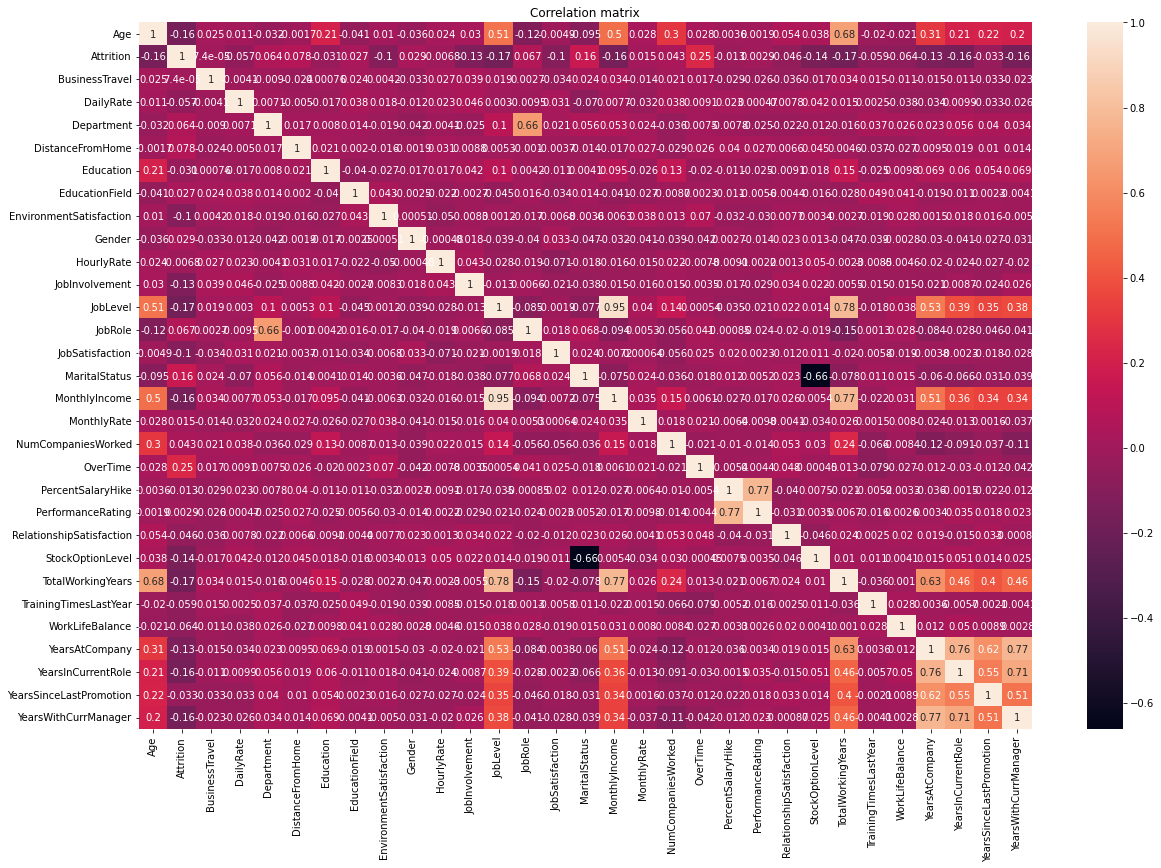

In [171]:
#plotting the correlation matrix using heatmap

corr_matrix = df.corr()
plt.figure(figsize=[20,13])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

### with this,
### 1) 'PercentSalaryHike' and 'HourlyRate' both columns have least neagtive correlation(~1%) with "Attrition".
### 2) 'TotalWorkingYears' has highest negative correlation(~17%) with "Attrition".
### 3) 'BusinessTravel'(<1%),'PerformanceRating'(1%) and 'MonthlyRate' (~1%) columns have least positive correlation with "Attrition".
### 4) 'OverTime' column has highest positive correlation(~25%) with "Attrition"

## Checking with outliers

In [172]:
df1 = df.iloc[:,:8]
df2 = df.iloc[:,8:16]
df3 = df.iloc[:,16:24]
df4 = df.iloc[:,24:]

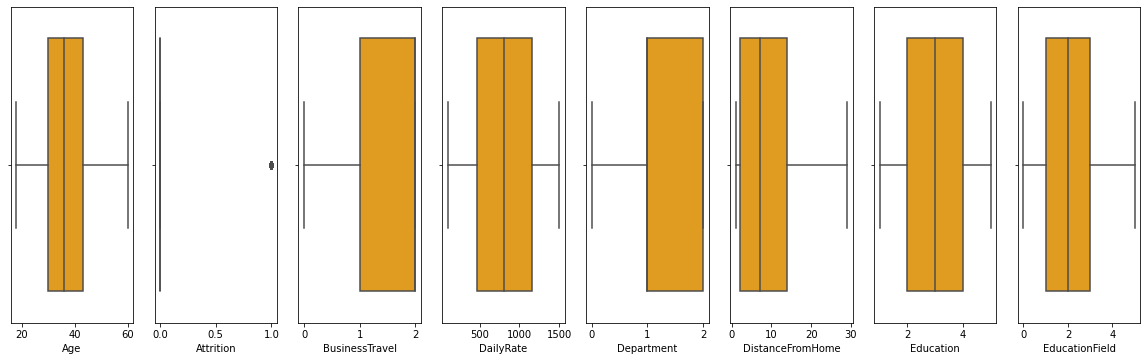

In [173]:
column_list = df1.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

No outliers present in above columns

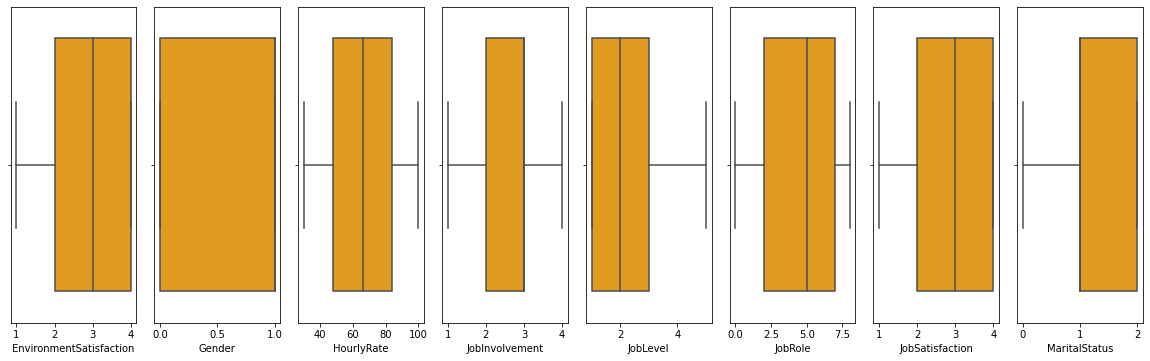

In [174]:
column_list = df2.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df2[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

no Outliers present in above graph

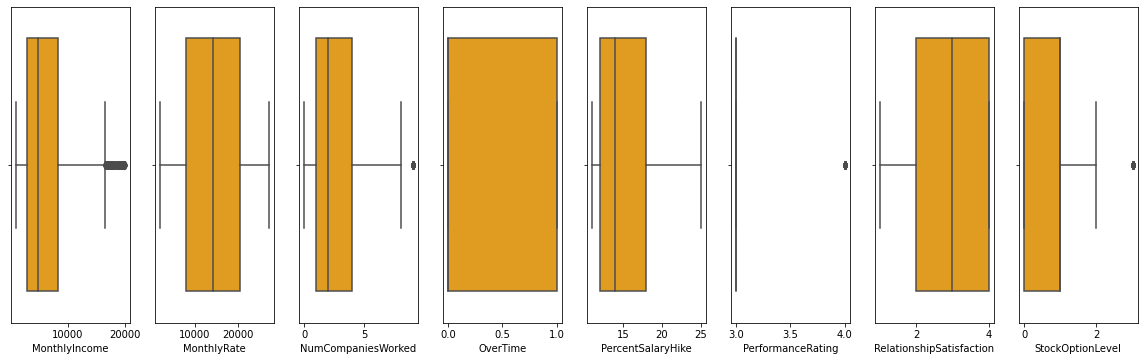

In [175]:
column_list = df3.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df3[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

Now,we can see there are outliers in "monthlyincome" along with few outliers appearing in other three columns.

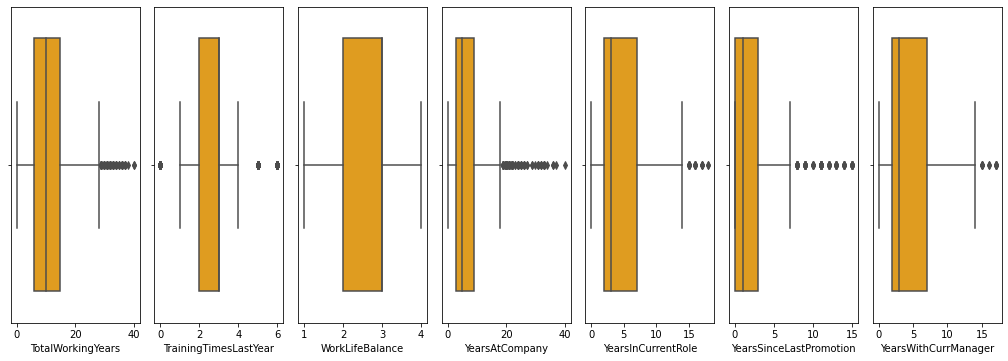

In [176]:
column_list = df4.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df4[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

with above observation,we can see that "TotalWorkingyears","YearsAtcompany","Yearssincelastpromotion" columns have more number of outliers.wheras columns like "trainingTmeslastyear","YearsinCurrentRole","Yearswthcurrmanager" also contains a few outliers in it.

## checking with Skewness

In [177]:
df.skew().sort_values()

BusinessTravel             -1.439006
WorkLifeBalance            -0.552480
JobInvolvement             -0.498419
Gender                     -0.408665
JobRole                    -0.357270
JobSatisfaction            -0.329672
EnvironmentSatisfaction    -0.321654
RelationshipSatisfaction   -0.302828
Education                  -0.289681
MaritalStatus              -0.152175
HourlyRate                 -0.032311
DailyRate                  -0.003519
MonthlyRate                 0.018578
Department                  0.172231
Age                         0.413286
EducationField              0.550371
TrainingTimesLastYear       0.553124
PercentSalaryHike           0.821128
YearsWithCurrManager        0.833451
YearsInCurrentRole          0.917363
DistanceFromHome            0.958118
OverTime                    0.964489
StockOptionLevel            0.968980
JobLevel                    1.025401
NumCompaniesWorked          1.026471
TotalWorkingYears           1.117172
MonthlyIncome               1.369817
Y

by setting up the threshold for skewness in the range of -1 to +1

# Data cleaning

### With tha above observations,
### 1)Columns like "PerformanceRating" and "BusinessTravel" have less correlation with target variable and also have skewness of more than 1.
### 2)Columns like "YearsSinceLastPromotion","MonthlyIncome", "YearsAtCompany" and "TotalWorkingYears" have more number of outliers and also have skewness of more than 1.
### So,we can remove all these columns from dataframe.

In [178]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [179]:
df = df.drop(['BusinessTravel','PerformanceRating','YearsSinceLastPromotion','MonthlyIncome',"YearsAtCompany",'TotalWorkingYears'],axis=1)

In [180]:
df.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager
0,41,1,1102,2,1,2,1,2,0,94,3,2,7,4,2,19479,8,1,11,1,0,0,1,4,5
1,49,0,279,1,8,1,1,3,1,61,2,2,6,2,1,24907,1,0,23,4,1,3,3,7,7
2,37,1,1373,1,2,2,4,4,1,92,2,1,2,3,2,2396,6,1,15,2,0,3,3,0,0
3,33,0,1392,1,3,4,1,4,0,56,3,1,6,3,1,23159,1,1,11,3,0,3,3,7,0
4,27,0,591,1,2,1,3,1,1,40,3,1,2,2,1,16632,9,0,12,4,1,3,3,2,2


## Removing the outliers

In [181]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df))
z_n.shape

(1470, 25)

In [182]:
threshold = 3

df_new = df[(z_n<threshold).all(axis=1)]
print(df.shape)
print(df_new.shape)

#printing the total number of dropped rows
print(df.shape[0]-df_new.shape[0])

(1470, 25)
(1445, 25)
25


### calcuating the percentage of data loss

In [183]:
loss_perc = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

data loss percentage:1.70%


there is a 1.70% data loss which is good to proceed for further

## Dividing the data into features and vectors

In [184]:
y = df_new[["Attrition"]]
x = df_new.drop(["Attrition"],axis=1)

## Checking with multicollinearity

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif_value(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [186]:
calc_vif_value(x)

,variables,VIF
0,Age,24.355684
1,DailyRate,4.965145
2,Department,12.651258
3,DistanceFromHome,2.303707
4,Education,9.297401
5,EducationField,3.824860
6,EnvironmentSatisfaction,7.002248
7,Gender,2.500496
8,HourlyRate,10.835432
9,JobInvolvement,14.317297


### Reducing the multicollinearity

In [187]:
x["Age_PercentSalaryHike"] = df.apply(lambda x_1: x_1['Age'] - x_1['PercentSalaryHike'],axis=1)
x["WorkLifeBalance_JobInvolvement"] = df.apply(lambda x_1: x_1['WorkLifeBalance'] - x_1['JobInvolvement'],axis=1)
x["Department_HourlyRate"] = df.apply(lambda x_1: x_1['Department'] - x_1['HourlyRate'],axis=1)

In [188]:
x= x.drop(["Age","PercentSalaryHike"],axis=1)
x = x.drop(["WorkLifeBalance","JobInvolvement"],axis=1)
x = x.drop(["Department","HourlyRate"],axis=1)

In [189]:
calc_vif_value(x)

,variables,VIF
0,DailyRate,4.834241
1,DistanceFromHome,2.283203
2,Education,8.764730
3,EducationField,3.748290
4,EnvironmentSatisfaction,6.757479
5,Gender,2.460481
6,JobLevel,6.678204
7,JobRole,4.130981
8,JobSatisfaction,6.635422
9,MaritalStatus,5.376706


Now,its much better with the previous values

## Transforming data to eliminate skewness

In [190]:
from sklearn.preprocessing import power_transform
x = power_transform(x)
x[:5]

array([[ 0.75507026, -1.49244581, -0.90978241, -0.96098587, -0.71378927,
        -1.22828358,  0.26777544,  1.03459175,  1.19013098,  1.23315508,
         0.74457901,  1.62050975,  1.58075594, -1.53026323, -1.08557575,
        -2.58064427,  0.23121958,  0.52529484,  0.86721048, -1.98951411,
        -1.32070858],
       [-1.34217869,  0.24626587, -1.76813882, -0.96098587,  0.20372452,
         0.81414424,  0.26777544,  0.61686941, -0.71519503, -0.13583322,
         1.4009283 , -0.56555193, -0.63260872,  1.22733082,  0.54943443,
         0.21803647,  0.93302132,  0.95965359,  0.47905416,  0.96589368,
         0.19850969],
       [ 1.33978769, -1.02912668, -0.90978241,  1.2458677 ,  1.21074448,
         0.81414424, -1.16284055, -1.00752372,  0.19231026,  1.23315508,
        -1.89355609,  1.27209045,  1.58075594, -0.70356727, -1.08557575,
         0.21803647, -1.5857131 , -1.54026201,  0.08168088,  0.96589368,
        -1.27488276],
       [ 1.37963762, -0.69799381,  1.0867191 , -0.96098587

In [191]:
x_n1 = pd.DataFrame(x)
x_n1.skew()

0    -0.197102
1    -0.007307
2    -0.099535
3    -0.009425
4    -0.206012
5    -0.414570
6     0.106123
7    -0.323834
8    -0.213674
9    -0.157826
10   -0.183638
11    0.015440
12    0.949133
13   -0.195154
14    0.089303
15    0.057609
16   -0.071192
17   -0.077428
18    0.037999
19    0.000924
20    0.109972
dtype: float64

Its much better with skewness values compared to previous values

## Selecting a best random state

In [192]:
#importing a necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

accu_score = 0
maxRS = 0 #best random state value for max accuracy_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  predic = LR.predict(x_test)
  acc = accuracy_score(y_test,predic)
  if acc > accu_score:
    accu_score = acc
    maxRS = i
print("Best accuracy_score is ",accu_score," on Random state ",maxRS)

Best accuracy_score is  0.9100346020761245  on Random state  71


In [193]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = 71)

In [194]:
print(x_train.shape,y_train.shape)

(1156, 21) (1156, 1)


In [195]:
print(x_test.shape,y_test.shape)

(289, 21) (289, 1)


In [211]:
# To predict the Attrition status,we can consider Logistic regressiom model
LR = LogisticRegression()
LR.fit(x_train,y_train)
predic_1 = LR.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_1)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_1)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_1))
print(classification_report(y_test,predic_1))

accuracy_score is 0.910
f1_score is 0.458
[[252   1]
 [ 25  11]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       253
           1       0.92      0.31      0.46        36

    accuracy                           0.91       289
   macro avg       0.91      0.65      0.70       289
weighted avg       0.91      0.91      0.89       289



In [208]:
#using DecisionTree classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predic_2 = DT.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_2)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_2)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_2))
print(classification_report(y_test,predic_2))

accuracy_score is 0.806
f1_score is 0.349
[[218  35]
 [ 21  15]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       253
           1       0.30      0.42      0.35        36

    accuracy                           0.81       289
   macro avg       0.61      0.64      0.62       289
weighted avg       0.84      0.81      0.82       289



In [209]:
#Using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()
KN.fit(x_train,y_train)
predic_3 = KN.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_3)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_3)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_3))
print(classification_report(y_test,predic_3))

accuracy_score is 0.879
f1_score is 0.286
[[247   6]
 [ 29   7]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       253
           1       0.54      0.19      0.29        36

    accuracy                           0.88       289
   macro avg       0.72      0.59      0.61       289
weighted avg       0.85      0.88      0.85       289



In [212]:
#Using Random forest Classifer
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predic_4 = RF.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_4)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_4)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_4))
print(classification_report(y_test,predic_4))

accuracy_score is 0.896
f1_score is 0.318
[[252   1]
 [ 29   7]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       253
           1       0.88      0.19      0.32        36

    accuracy                           0.90       289
   macro avg       0.89      0.60      0.63       289
weighted avg       0.89      0.90      0.87       289



f1_score and accuracy is high for logistic regression model

## Cross Validation to check with overfitting

In [213]:
from sklearn.model_selection import cross_val_score

#for Logistic regression model
L_cr = cross_val_score(LR,x,y,cv=5)
print("cross validation for Logistics regression model : ",L_cr.mean())

cross validation for Logistics regression model :  0.8622837370242215


In [214]:
L_cr = cross_val_score(KN,x,y,cv=5)
print("cross validation for KNN classifier model : ",L_cr.mean())

cross validation for KNN classifier model :  0.8401384083044983


In [215]:
L_cr = cross_val_score(DT,x,y,cv=5)
print("cross validation for Decision tree model : ",L_cr.mean())

cross validation for Decision tree model :  0.7647058823529411


In [216]:
L_cr = cross_val_score(RF,x,y,cv=5)
print("cross validation for Random forest model : ",L_cr.mean())

cross validation for Random forest model :  0.853287197231834


here also,the CV score is more for Logstic regression model.
So, I will take my final model as logistic regression model

## Hyper parameter tuning

In [217]:
from sklearn.model_selection import GridSearchCV

params_list = {'penalty':['l1','l2','elasticnet','none'],
               'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
               'multi_class':['auto','ovr','multinomial']}
GCV = GridSearchCV(LogisticRegression(),params_list,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)

#printing the best parameter
GCV.best_params_

{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}

In [221]:
#now predicting with best parameters

GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the final accuracy
accuracy_score(y_test,GCV_predic)
#f1_score(y_test,GCV_predic)

0.9100346020761245

it was almost same accuracy and f1_score compared with before tuning the mocdel

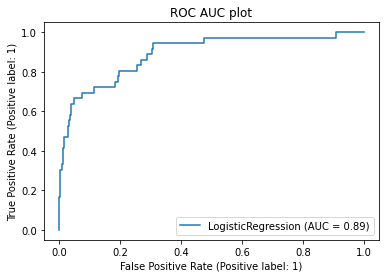

In [222]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

from the above graph we got AUC score is 90%.

In [223]:
import joblib
joblib.dump(GCV.best_estimator_,"HR_Analytics_Project.pkl")

['HR_Analytics_Project.pkl']